# KNN 
- 분류모델, 새로운 데이터의 클래스 예측
#### 적절한 k
- k가 너무 작음 -> _overfitting_ (가장 가까운 데이터에 의존, 그 데이터가 이상치일 경우 예측이 틀려짐, 과대적합)
- k가 너무 큼 => _underfitting_ (너무 많은 데이터 참조, 국지적 특성 반영X, 과소적합)
- k를 1부터 바꿔가며 모델의 정확도를 측정하여, 가장 높게 나오는 것으로 지정

---


#### 데이터 정규화
- 타이타닉 dataset의 경우 나이, 객실 등급 등 범위가 다름. -> 범위가 큰 데이터가 거리 계산에 큰 영향을 미침
- => 정규화 or 표준화

---


#### 혼동 행렬 - confusion matrix
이모델을 얼마나 신뢰할수 있을까?
- TP(True Positive) : 맞춘것 (실제:생존 -> 예측:생존)
- TN(True Nagative) : 맞춘것 (실제:사망 -> 예측:사망)
- FP(False Postive) : 틀린것 (실제:사망 -> 예측:생존) --> 제 1종 오류
- FN(False Nagative): 틀린것 (실제:생존 -> 예측:사망) --> 제 2종 오류

---
#### 평가지표
##### > 정확도(Accuaracy): (TP+TN) / (P+N) <br>
- 전체 데이터 중 올발르게 예측한 비율 (단점: 클래스가 불균형일때, 왜곡될 수 있음)
##### > 정밀도(Precision): TP / (TP+FP) <br>
- 예측값=Positive -> 실제값=Positiv인 비율
- False Positive가 적다
#### > 재현율(Recall): TP / (TP+FN)
- 실제값=Positive -> 예측값=Positive인 비율
- False Negative가 적다
##### > F1-score: 2 x (recall*precision / recall+precision)
- 정밀도와 재현율의 조화평균, 두 지표가 모두 중요할 때, 클래스 불균형이 있는 dataset에 유용, 가장 많이 이용함

---
##### > 1. 데이터 수집
##### > 2. 데이터 EDA
- 탐색적 데이터 분석
- 주로 시각화
- 인사이트 도출

##### > 3. 데이터 전처리
- 결측치, 이상치, 타입에 맞지 않는 데이터 처리, onehot, 연속형->범주형, 상관계수

loop:
##### > 4. 학습에 사용할 컬럼 추출

##### > 5. 분류 회귀에 따라 적절한 모델 선택
- 가장 기본이 되는 base model 선정 -> 다양한 모델과의 비교학습을 통해 성능 최상의 모델 선택

##### > 6. 최종 평가
- 좋으면 선택
- 그렇지 않으면 모델 재학습

In [2]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

df.head()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# 중복 데이터 확인
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
# 데이터 통계 요약정보 확인
df.describe()

In [ ]:
# 데이터 통계 요약정보 확인 (범주형)
df.describe(include='object')

In [ ]:
plt.figure(figsize=(6,10))
sns.boxenplot(data=df.select_dtypes(include=['float64', 'int64']),orient='v')
plt.show()

In [ ]:
sns.boxplot(data=df,x='age')

### Target variable (y)

In [ ]:
# 목표변수
df['survived'].value_counts()

In [ ]:
# 목표변수 - 시각화
# 클래스의 불균형 확인
sns.countplot(data=df, x='survived');

In [ ]:
# 시각화
# sns.FacetGrid() -> 패싯 그리드 
g = sns.FacetGrid(df, col='survived', row='pclass', hue='sex')
g.map(sns.kdeplot, 'age', alpha=0.5, fill=True)
g.add_legend();

In [ ]:
# 시각화
# sibsp: 본인 제외 동반자 수
sns.displot(x='sibsp', kind='hist', hue='survived', data=df, multiple='fill');

In [ ]:
# 시각화 
sns.displot(x='parch', kind='hist', hue='survived', data=df, multiple='fill');

In [ ]:
# 시각화 
sns.boxplot(x='embarked', y='age', hue='survived', data=df);

In [ ]:
'''
[Step 3] 데이터 전처리
'''

# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

In [ ]:
df.columns

In [ ]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
rdf.columns.values

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - NaN 값
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))

In [ ]:
#(1) embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

In [ ]:
# (2) mode 메소드 활용 (최빈값)
most_freq2 = rdf['embarked'].mode()[0]   
print(most_freq2)

In [ ]:
# describe 메소드 활용 (최빈값)
rdf.describe(include='object')

In [ ]:
# 최빈값으로 누락 데이터 치환하기
rdf['embarked'] = rdf['embarked'].fillna(most_freq)

# 결측치 확인하기
rdf.isnull().sum()

In [ ]:
'''
[Step 4] 변수 선택
'''

# 분석에 활용할 열(특성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf = ndf.drop(['sex', 'embarked'], axis=1)
ndf.head() 

In [ ]:
'''
[Step 5] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]    #독립 변수 X
y = ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

In [ ]:
'''
[Step 6] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

In [ ]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)          
print(knn_report)

In [ ]:
# k-nn
import numpy as np
import matplotlib.pyplot as plt
# 데이터 (닷맛 아삭함)
X_train = np.array([ [3,4],[4,4],[5,4],[3,5],[7,7],[7,4] ])  # 학습
y_train = np.array([0,1,1,0,1,0])  # 레이블 또는 클래스
# 새로운 데이터
X_new = np.array([ [5,5] ])  # 테스트
# 시각화로 데이터 분포 확인
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],marker='o',color='r',label='class 1')
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],marker='x',color='b',label='class 0')
plt.scatter(X_new[:,0],X_new[:,1],marker='*',color='g',label='new data')
plt.legend()
plt.show()

#. 1 새로운 데이터와 기존 데이터간의 거리 계산
print(X_train)
print((X_train - X_new)**2)
# 거리공식
dists = np.sqrt(np.sum((X_train - X_new)**2, axis=1)) # axis=1 행방향
print(f'각 데이터와의 거리 : {dists}')

#. 2 가장 가까운 k개의 데이터 선택
k = 3
# 거리를 기준으로 정렬
nearest_neighbors = np.argsort(dists)  # 오름차순 정렬
print(f'가장 가까운 데이터의 인덱스 : {nearest_neighbors}')
topk_neighbors = nearest_neighbors[:k]  # k개 선택
topk_neighbors
y_train[topk_neighbors]  # k개의 레이블
from collections import Counter
Counter(y_train[topk_neighbors]).most_common(1)[0][0]  # 최빈값
print(f'최종 결정 클래스 : {Counter(y_train[topk_neighbors]).most_common(1)[0][0]}')

# 데이터 정규화

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# 키 와 몸무게
X = np.array([[170, 70], [180, 80], [160, 50], [175, 65], [155, 45]])
y = np.array([0, 1, 0, 1, 0])
# 새로운 데이터
X_new = np.array([[178, 75]])

# 데이터 정규화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X)
net_data_scaled = scaler.transform(X_new)  # 훈련세트와 동일한 기준으로 변환

# 모델 생성 k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y)

# 예측
prediction = knn.predict(net_data_scaled)
prediction

# 예제

In [1]:
# 타이타닉과 유사하게 데이터 생성하여 실습하자!

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
# 가상 데이터 생성(특성 9개)
X,y = make_classification(n_samples=500, n_features=9, n_informative=5, n_redundant=0, random_state=42)

scaler = StandardScaler()

# 데이터 분할 및 정규화
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# K값의 변화에 따른 정확도 측정
k_range = range(1,20)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,y_train)
    accuracies.append(knn.score(x_test_scaled,y_test))


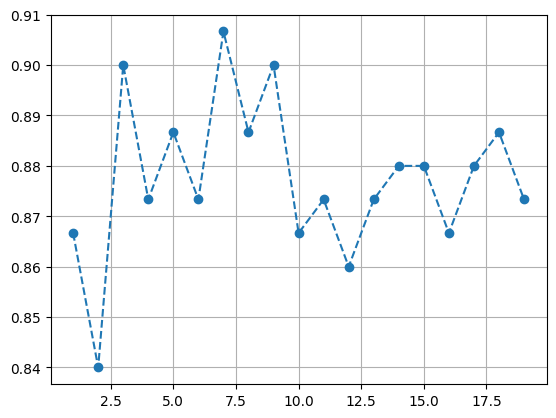

In [3]:
# 정확도 시각화 (Elbow Method)
plt.plot(k_range,accuracies,marker='o',linestyle='--')
plt.grid(True)
plt.show()

#  클래스 불균형
타이타닉
- under sampling
- over sampling

In [ ]:
# %pip install imbalanced-learn

   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/240.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 240.0/240.0 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from collections import Counter
Counter(y)

Counter({np.int64(1): 251, np.int64(0): 249})

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled = rus.fit_resample(X,y)
print( Counter(y_resampled) )
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, 
                                                    stratify= y_resampled,
                                                    random_state=10) 
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
Counter(y_train), Counter(y_test)

Counter({np.int64(0): 249, np.int64(1): 249})
train data 개수:  (348, 9)
test data 개수:  (150, 9)


(Counter({np.int64(1): 174, np.int64(0): 174}),
 Counter({np.int64(0): 75, np.int64(1): 75}))